In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
gdf = gpd.read_file(r'C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_07_proxy.shp', encoding='latin-1')
gdf

,osmid,mp_prog,far,osmlanduse,mp_plotare,heritage_n,amenity,name,levels,age,...,hdb_1roo_1,hdb_2roo_1,hdb_3roo_1,hdb_4roo_1,hdb_5roo_1,hdb_exec_1,hdb_mult_1,hdb_stud_1,age_proxy,geometry
0,1337396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961.0,None
1,1362701,NaN,NaN,NaN,NaN,NaN,parking,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1969.0,None
2,1407265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1982.0,None
3,1447583,NaN,NaN,NaN,NaN,NaN,NaN,20,12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.0,None
4,1447589,NaN,NaN,NaN,NaN,NaN,NaN,22,12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112960,1165422507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997.0,None
112961,1165422508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975.0,None
112962,1165450372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0,None
112963,1165450373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.0,None


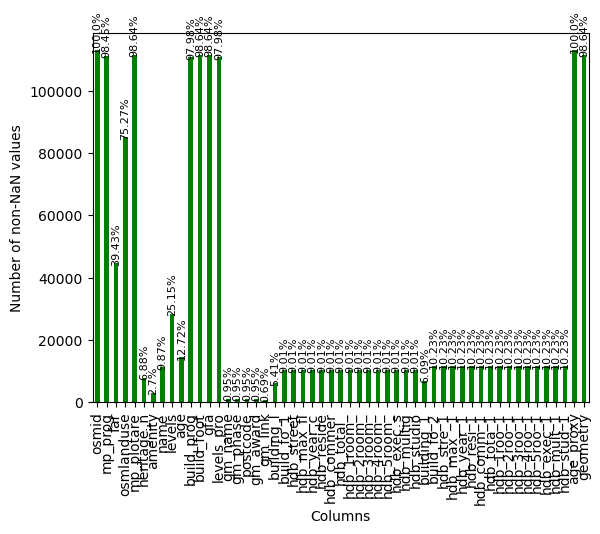

In [13]:
# get the count of non-NaN values for each column
gdfy = gdf
counts = gdfy.count()

# create a bar plot of non-NaN counts with red color
ax = counts.plot(kind='bar', color='green')

# add the count percentage above each bar
for i, v in enumerate(counts):
    ax.text(i, v+5, str(round((v/gdfy.shape[0])*100, 2)) + '%', ha='center', rotation=90, size=8)
    
# set the x-label and y-label
ax.set_xlabel('Columns')
ax.set_ylabel('Number of non-NaN values')

plt.show()

In [5]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 112965 entries, 0 to 112964
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   osmid       112965 non-null  int64   
 1   mp_prog     111211 non-null  object  
 2   far         44540 non-null   float64 
 3   osmlanduse  85026 non-null   object  
 4   mp_plotare  111424 non-null  float64 
 5   heritage_n  7770 non-null    object  
 6   amenity     3054 non-null    object  
 7   name        11150 non-null   object  
 8   levels      28415 non-null   object  
 9   age         14367 non-null   float64 
 10  build_prog  110687 non-null  object  
 11  build_foot  111424 non-null  float64 
 12  gfa         111424 non-null  float64 
 13  levels_pro  112965 non-null  int64   
 14  gm_name     1072 non-null    object  
 15  gm_phase    1072 non-null    object  
 16  postcode    1072 non-null    object  
 17  gm_award    1072 non-null    object  
 18  gm_link     777 

In [7]:
#convert level to integer
gdf['levels'] = pd.to_numeric(gdf['levels'], errors='coerce').astype('Int64')

In [8]:
#analyze if levels and levels_proxy are equal
# compare values in col1 and col2 and create a new column with the result
gdf['match'] = gdf['levels'] == gdf['levels_pro']

# count the number of matching and non-matching values
result_counts = gdf['match'].value_counts()
result_match_count = result_counts.get(True, 0)
result_caramba_count = result_counts.get(False, 0)

print("Matching values: ", result_match_count)
print("Non-matching values: ", result_caramba_count)

Matching values:  23758
Non-matching values:  4657


In [9]:
#if no, replace levels_proxy with levels
mask = (gdf['levels'].notnull()) & (gdf['match'] == 'False')
gdf.loc[mask, 'levels_pro'] = gdf['levels']

In [11]:
gdf = gdf.drop(columns = ['match'])

In [14]:
gdf['build_prog'].unique()

array(['small_box', nan, 'medic', 'resident_high', 'deco_box', 'civic',
       'education', 'transport', 'glass_box', 'industrial',
       'construction_site', 'resident_low', 'religious', 'sport', 'ruins',
       'RESIDENTIAL'], dtype=object)

In [12]:
#replace with NaN items without program
mask = gdf['build_prog'].isna()

# update the values in the 'levels_pro' column using the boolean mask
gdf.loc[mask, 'levels_pro'] = np.nan

In [16]:
df = pd.read_csv(r'C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_Singa/hdb-property-information/hdb-property-information.csv', encoding='utf-8')
df.head(8)

,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,...,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental
0,1,BEACH RD,16,1970,Y,Y,N,N,N,N,...,138,1,2,0,0,0,0,0,0,0
1,1,BEDOK STH AVE 1,14,1975,Y,N,N,Y,N,N,...,204,0,2,0,0,0,0,0,0,0
2,1,CANTONMENT RD,2,2010,N,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,0,0
3,1,CHAI CHEE RD,15,1982,Y,N,N,N,N,N,...,0,10,92,0,0,0,0,0,0,0
4,1,CHANGI VILLAGE RD,4,1975,Y,Y,N,N,N,N,...,54,0,1,0,0,0,0,0,0,0
5,1,DELTA AVE,25,1982,Y,N,N,N,N,N,...,0,0,96,0,0,0,0,0,0,0
6,1,DOVER RD,12,1975,Y,N,N,Y,N,N,...,118,0,7,0,0,0,0,0,0,0
7,1,EUNOS CRES,14,1977,Y,N,N,Y,N,N,...,0,0,0,0,0,0,0,247,0,0


In [18]:
#copy values from hdb_max__1 to levels_pro
# create a boolean mask for the rows to update
mask2 = gdf['hdb_max__1'].notnull()

# update the values in the 'levels_pro' column using the boolean mask
gdf.loc[mask2, 'levels_pro'] = gdf['hdb_max__1']

In [19]:
# create a boolean mask for the rows to update
mask3 = gdf['build_prog'] == 'RESIDENTIAL'

# update the values in the 'build_prog' column using the boolean mask
gdf.loc[mask3, 'build_prog'] = 'resident_high'

In [20]:
mask5 = (gdf['build_prog'] == 'resident_high') & (gdf['levels_pro'] < 9)

# update the values in the 'levels_pro' column using the boolean mask
gdf.loc[mask5, 'levels_pro'] = np.random.randint(12, 31, size=mask5.sum())

In [21]:
gdf['osmlanduse'].unique()

array([nan, 'commercial', 'park', 'residential', 'industrial', 'retail',
       'nature_reserve', 'military', 'grass', 'meadow', 'forest',
       'recreation_ground', 'scrub', 'allotments', 'farmyard', 'farmland',
       'cemetery', 'quarry'], dtype=object)

In [23]:
mask6 = (gdf['osmlanduse'] == 'residential') & (gdf['levels_pro'].isna())

gdf.loc[mask6, 'levels_pro'] = np.random.randint(12, 31, size=mask6.sum())

In [24]:
gdf.to_file('C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_08_proxy.shp', crs='EPSG:4326')

In [25]:
#by mask get rows that have non-NaN values in all columns
maskx = gdf.dropna(how='any').index

# select the rows with non-NaN values in all columns and show the first 10 rows
gdf.loc[maskx].head(10)

,osmid,mp_prog,far,osmlanduse,mp_plotare,heritage_n,amenity,name,levels,age,...,hdb_1roo_1,hdb_2roo_1,hdb_3roo_1,hdb_4roo_1,hdb_5roo_1,hdb_exec_1,hdb_mult_1,hdb_stud_1,age_proxy,geometry


In [30]:
gdf['heritage_n'].unique()

array([nan, 'Subordinate Courts', 'Dairy Farm', 'Clarke Quay',
       'Emerald Hill', 'Orchard Road No. 14 to 38',
       'Bras Basah Road Conservation Area', 'Singapore Cricket Club',
       'Capitol Theatre, Capitol Building and Stamford House',
       'Fullerton Building', 'Joo Chiat Conservation Area',
       'Singapore Botanic Gardens',
       'University of Singapore, Former (Bukit Timah Campus)',
       'Chinatown (Kreta Ayer)', 'Chinatown (Bukit Pasoh)',
       'China Square', 'Asia Insurance Building, Former',
       'Robinson Road No. 35 (TAS Building, Former)', 'Sentosa',
       'Sri Krishnan Temple', 'Margaret  Drive No 53', 'Southern Ridges',
       'Pulau Ubin No. 1', 'Chinatown (Tanjong Pagar)',
       'Jurong Town Hall, Former',
       'Convent of the Holy Infant Jesus, Former',
       'CLIFFORD PIER, FORMER CUSTOMS HARBOUR BRANCH BUILDING AND CHANGE ALLEY PLAZA AT COLLYER QUAY',
       'Alexandra Hospital',
       'Traffic Police Headquarters Building, Former and Forme

In [31]:
gdf['amenity'].unique()

array([nan, 'parking', 'community_centre', 'hospital', 'school',
       'place_of_worship', 'theatre', 'clinic', 'social_facility',
       'college', 'police', 'marketplace', 'childcare', 'shelter',
       'library', 'fire_station', 'fast_food', 'food_court', 'toilets',
       'fuel', 'bank', 'conference_centre', 'restaurant', 'doctors',
       'cafe', 'ice_cream', 'pharmacy', 'pub', 'bar', 'nursing_home',
       'waste_transfer_station', 'waste_disposal', 'music_school',
       'public_building', 'townhall', 'vehicle_inspection',
       'kindergarten', 'arts_centre', 'ferry_terminal', 'atm',
       'dressing_room', 'car_wash', 'driving_school', 'bus_station',
       'cinema', 'bicycle_rental', 'monastery', 'commercial',
       'crematorium', 'post_office', 'veterinary', 'dentist', 'studio',
       'prep_school', 'car_rental', 'social_centre', 'language_school',
       'university', 'events_venue', 'bicycle_parking', 'taxi',
       'Clubhouse', 'shower', 'clubhouse', 'stage'], dtype=ob

In [34]:
gdf['name'].unique()

array([nan, '20', '22', ..., 'Prima Food Building', 'Revv',
       'Westlite Jalan Tukang'], dtype=object)

In [35]:
gdf['gm_name'].unique()

array([nan, 'Changi Airport Terminal 1', 'Sim Lim Square', ...,
       'Waterway Ridges', 'Floral Spring @ Yishun',
       'FairPrice Supermarket at Bukit Batok Home Team'], dtype=object)